# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

3 OBSERVABLE TRENDS:
1)there's a pretty strong relationship between latitude and Max Temp for both the northern and southern 
    hemisphere.
2)no strong link could be seen between latitude and the other metrics being detailed--Humidity, Wind 
    Speed, nor Cloudiness.
3)fairly strong evidence to show that the closer to the equator a city is located, the higher the Max 
    Temp measured.

In [1]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from api_keys import weather_api_key
from api_keys import g_key
import numpy as np
from citipy import citipy
from scipy.stats import linregress


## Generate Cities List

In [2]:
lat_range = (-90, 90)
lng_range = (-180, 180)
cities = []
lat_lngs = []
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:    
    city=citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    if city not in cities: 
        cities.append(city)
len(cities)



608

In [3]:
city

'mys shmidta'

In [4]:

# Loop through the list of cities and perform a request for data on each
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
weather_response = requests.get(query_url).json()
weather_response



{'cod': '404', 'message': 'city not found'}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
name=[]
lat=[]
lon=[]
temp=[]
humid=[]
cloud=[]
wind=[]
country=[]
date=[]


for i,city in enumerate (cities):
    try:
        queryurl=f"{url}appid={weather_api_key}&q={city}&units={units}"
        response = requests.get(queryurl).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        pass
    print(i, city)
   

0 mataura
1 ulubaria
2 atuona
3 ushuaia
4 guaruja
5 kapaa
6 bethanien
7 ponta do sol
8 barentsburg
9 port alfred
10 dikson
11 turukhansk
12 praia
13 hermanus
14 rikitea
15 mackay
16 olafsvik
17 fairbanks
18 busselton
19 kaitangata
20 jamestown
21 lorengau
22 constitucion
23 worthington
24 narsaq
25 longyearbyen
26 bilibino
27 hobart
28 cherskiy
29 cape town
30 sebinkarahisar
31 pevek
32 sao filipe
33 bubaque
34 castro
35 saint-philippe
36 nikolskoye
37 faanui
38 vaini
39 punta arenas
40 torbay
41 yellowknife
42 iisalmi
43 birao
44 taolanaro
45 mar del plata
46 khatanga
47 bainbridge
48 saint-pierre
49 avarua
50 alghero
51 barrow
52 la motte-servolex
53 dongsheng
54 teya
55 souillac
56 jumilla
57 mys shmidta
58 solnechnyy
59 severo-kurilsk
60 pangnirtung
61 urusha
62 krasnoslobodsk
63 mitsamiouli
64 bluff
65 attawapiskat
66 nanortalik
67 okhotsk
68 mersing
69 clyde river
70 lakes entrance
71 albany
72 qaqortoq
73 mali idos
74 chokurdakh
75 norman wells
76 alofi
77 asau
78 maragogi
79 na

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({"City": name, "Lat": lat, "Lng": lon, "Max Temp": temp, "Humidity": humid, "Cloudiness": cloud, "Wind Speed": wind, "Country": country, "Date": date})
weather_df.to_csv("Weather_Output.csv")
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,39.99,86,82,7.00,NZ,1600193069
1,Atuona,-9.80,-139.03,77.99,76,0,15.77,PF,1600193069
2,Ushuaia,-54.80,-68.30,37.40,74,75,21.92,AR,1600193010
3,Guarujá,-23.99,-46.26,69.01,100,90,3.36,BR,1600193069
4,Kapaa,22.08,-159.32,80.60,74,40,11.41,US,1600192929
...,...,...,...,...,...,...,...,...,...
551,Letlhakeng,-24.09,25.03,72.84,19,73,6.60,BW,1600193196
552,São Francisco de Assis,-29.55,-55.13,59.43,71,100,13.02,BR,1600193197
553,Dubinino,55.62,89.09,49.64,81,99,5.86,RU,1600193197
554,The Valley,18.22,-63.06,91.40,66,20,14.99,AI,1600193197


In [7]:
trim_weather_df=weather_df[["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]]
trim_weather_df = trim_weather_df.aggregate(['count','mean','std','min', 'max'])
quat_weather=weather_df.quantile([.25, .5, .75])
merge_weather=pd.merge(trim_weather_df, quat_weather, how="outer")
merge_weather.index = ["count", "mean","std","min","max", "25%","50%","75%"]
merge_weather



,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,19.635216,21.780576,66.916763,69.678058,51.834532,8.255378,1.600193e+09
std,33.407831,88.963310,16.011722,21.909946,35.681948,5.434387,7.869305e+01
min,-54.800000,-175.200000,24.820000,3.000000,0.000000,0.110000,1.600193e+09
max,78.220000,179.320000,109.670000,100.000000,100.000000,34.610000,1.600193e+09
25%,-7.305000,-54.477500,53.600000,58.000000,20.000000,4.000000,1.600193e+09
50%,22.745000,27.880000,69.800000,76.000000,50.500000,6.930000,1.600193e+09
75%,47.755000,98.320000,78.800000,86.000000,90.000000,11.357500,1.600193e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#weather_df.loc[weather_df["Humidity"]== 100]
indices = weather_df[ weather_df["Humidity"]== 100 ].index


In [9]:
#  Get the indices of cities that have humidity over 100%.
indices

Int64Index([3, 123, 157, 158, 172, 180, 242, 330, 349, 387, 420, 430, 443,
            458],
           dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
new_weather_df=weather_df.drop(indices , inplace=False)
new_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,39.99,86,82,7.00,NZ,1600193069
1,Atuona,-9.80,-139.03,77.99,76,0,15.77,PF,1600193069
2,Ushuaia,-54.80,-68.30,37.40,74,75,21.92,AR,1600193010
4,Kapaa,22.08,-159.32,80.60,74,40,11.41,US,1600192929
5,Bethanien,-26.50,17.16,55.58,38,0,13.15,NA,1600193070
...,...,...,...,...,...,...,...,...,...
551,Letlhakeng,-24.09,25.03,72.84,19,73,6.60,BW,1600193196
552,São Francisco de Assis,-29.55,-55.13,59.43,71,100,13.02,BR,1600193197
553,Dubinino,55.62,89.09,49.64,81,99,5.86,RU,1600193197
554,The Valley,18.22,-63.06,91.40,66,20,14.99,AI,1600193197


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

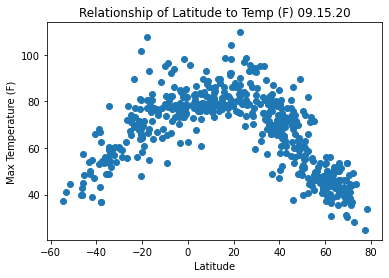

In [28]:
x_values = new_weather_df['Lat']
y_values = new_weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Relationship of Latitude to Temp (F) 09.15.20')
plt.show()

In [ ]:
#the above plot is showing the relationship of max temperature to latitude.
#and more specifically showing that the closer to the equator the temperature is measured, the 
    #the higher the Max Temperature becomes.

## Latitude vs. Humidity Plot

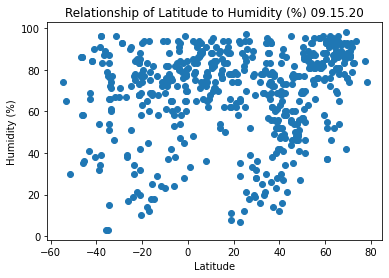

In [29]:
x_values = new_weather_df['Lat']
y_values = new_weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Relationship of Latitude to Humidity (%) 09.15.20')
plt.show()

In [ ]:
#the above plot is showing the relationship of Humidity percentage to latitude.
#doesn't appear to much of a correlation between humidity and latitdue.

## Latitude vs. Cloudiness Plot

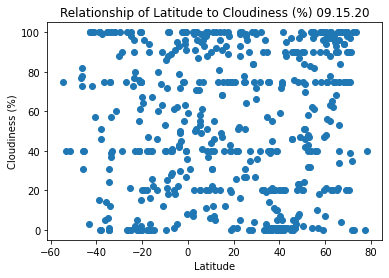

In [30]:
x_values = new_weather_df['Lat']
y_values = new_weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Relationship of Latitude to Cloudiness (%) 09.15.20')
plt.show()

In [ ]:
#the above plot is showing the relationship of cloudiness to latitude.
#again, not much of a correclation between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

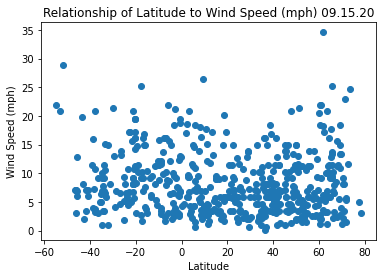

In [31]:
x_values = new_weather_df['Lat']
y_values = new_weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Relationship of Latitude to Wind Speed (mph) 09.15.20')
plt.show()

In [43]:
#the above plot is showing the relationship of wind speed to latitude.
#no clear correlation between speed of the wind and the latitude at which it is measured.

## Linear Regression

In [17]:
lat_n = new_weather_df.loc[new_weather_df["Lat"]>= 0]
lat_n
#separating out the cities in the Northern Latitude

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Kapaa,22.08,-159.32,80.60,74,40,11.41,US,1600192929
6,Ponta do Sol,32.67,-17.10,75.20,69,20,8.05,PT,1600193070
8,Dikson,73.51,80.55,44.47,94,100,24.63,RU,1600193071
9,Turukhansk,65.82,87.98,50.31,81,53,9.60,RU,1600193071
10,Praia,14.92,-23.51,81.63,76,68,8.99,CV,1600192803
...,...,...,...,...,...,...,...,...,...
545,Baghdad,33.34,44.40,95.00,20,0,5.82,IQ,1600193195
546,Limbang,4.75,115.00,77.00,94,75,2.24,MY,1600193195
548,Northam,51.03,-4.22,63.00,95,70,5.01,GB,1600193196
553,Dubinino,55.62,89.09,49.64,81,99,5.86,RU,1600193197


In [21]:
lat_S=new_weather_df.loc[new_weather_df["Lat"]< 0 ]
lat_S
#separating out the cities in the Southern Latitude

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,39.99,86,82,7.00,NZ,1600193069
1,Atuona,-9.80,-139.03,77.99,76,0,15.77,PF,1600193069
2,Ushuaia,-54.80,-68.30,37.40,74,75,21.92,AR,1600193010
5,Bethanien,-26.50,17.16,55.58,38,0,13.15,NA,1600193070
7,Port Alfred,-33.59,26.89,60.19,71,100,15.14,ZA,1600192957
...,...,...,...,...,...,...,...,...,...
549,Santa Elena,-2.23,-80.85,73.40,83,75,9.17,EC,1600193196
550,Kendari,-3.94,122.50,70.09,89,43,3.31,ID,1600193196
551,Letlhakeng,-24.09,25.03,72.84,19,73,6.60,BW,1600193196
552,São Francisco de Assis,-29.55,-55.13,59.43,71,100,13.02,BR,1600193197


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6698585981270577
y = -0.68x + 92.94


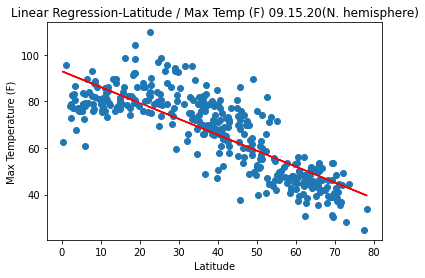

In [35]:
x_values = lat_n['Lat']
y_values = lat_n['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Linear Regression-Latitude / Max Temp (F) 09.15.20(N. hemisphere)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

In [ ]:
#linear regression and r-value showing pretty clear correlation between Latitude and Max Temp for 
    #northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5866859864232559
y = 0.76x + 84.01


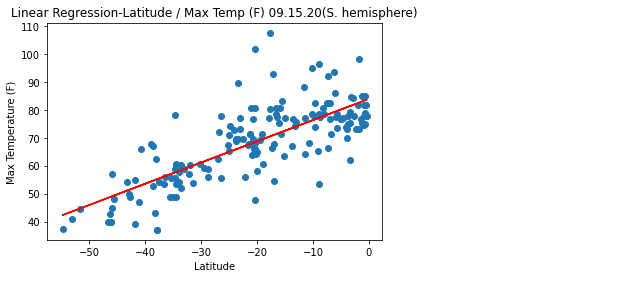

In [36]:
x_values = lat_S['Lat']
y_values = lat_S['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Linear Regression-Latitude / Max Temp (F) 09.15.20(S. hemisphere)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

In [ ]:
#linear regression and r-value showing pretty clear correlation between Latitude and Max Temp for 
    #southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.011130914113868342
y = 0.11x + 66.54


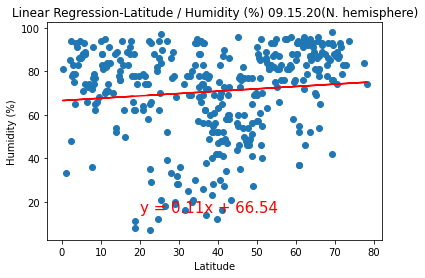

In [37]:
x_values = lat_n['Lat']
y_values = lat_n['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Linear Regression-Latitude / Humidity (%) 09.15.20(N. hemisphere)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

In [ ]:
#linear regression and r-value showing not much of a correlation between Latitude and Humidity for 
    #nothern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.006575891949731304
y = 0.13x + 67.66


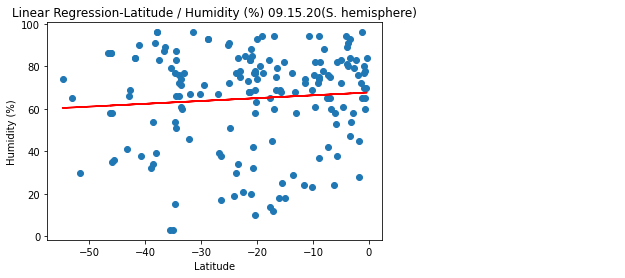

In [44]:
x_values = lat_S['Lat']
y_values = lat_S['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Linear Regression-Latitude / Humidity (%) 09.15.20(S. hemisphere)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

In [ ]:
#linear regression and r-value showing not much of a correlation between Latitude and Humidity for 
    #southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.005216149634539791
y = 0.13x + 46.41


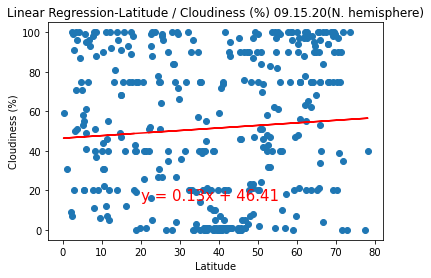

In [38]:
x_values = lat_n['Lat']
y_values = lat_n['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Linear Regression-Latitude / Cloudiness (%) 09.15.20(N. hemisphere)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

In [ ]:
#linear regression and r-value showing not much of a correlation between Latitude and cloudiness for 
    #northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 2.8219354247081093e-05
y = -0.01x + 52.11


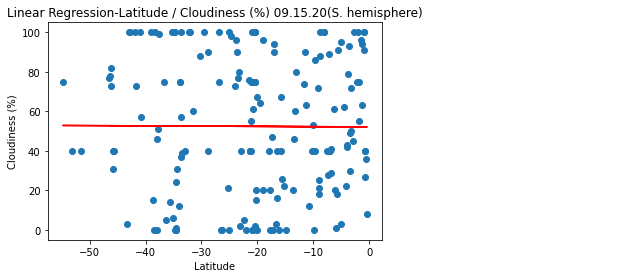

In [39]:
x_values = lat_S['Lat']
y_values = lat_S['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Linear Regression-Latitude / Cloudiness (%) 09.15.20(S. hemisphere)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

In [ ]:
#linear regression and r-value showing not much of a correlation between Latitude and cloudiness for 
    #southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.007902487404525496
y = 0.02x + 6.82


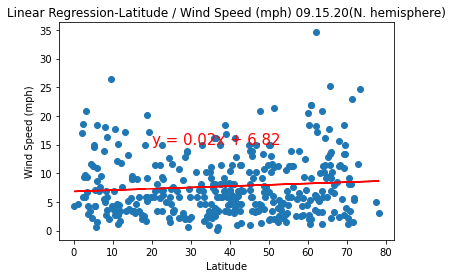

In [41]:
x_values = lat_n['Lat']
y_values = lat_n['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Linear Regression-Latitude / Wind Speed (mph) 09.15.20(N. hemisphere)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

In [ ]:
#linear regression and r-value showing not much of a correlation between Latitude and wind speed for 
    #northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00027749520696319707
y = -0.01x + 9.36


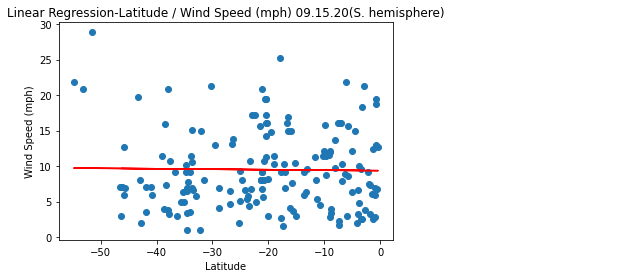

In [42]:
x_values = lat_S['Lat']
y_values = lat_S['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Linear Regression-Latitude / Wind Speed (mph) 09.15.20(S. hemisphere)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

In [ ]:
#linear regression and r-value showing not much of a correlation between Latitude and wind speed for 
    #southern hemisphere